<a href="https://colab.research.google.com/github/locdacknownothing/HandwrittenDigitRecognition/blob/main/handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import dataset and preprocess data

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras.optimizers import SGD
from keras.losses import MeanSquaredError, CategoricalCrossentropy
from keras.metrics import top_k_categorical_accuracy

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f"Train Images:{train_images.shape}")
print(f"Train Labels:{len(train_labels)}")
print(f"Test Images:{test_images.shape}")
print(f"Test Labels:{len(test_labels)}")

Train Images:(60000, 28, 28)
Train Labels:60000
Test Images:(10000, 28, 28)
Test Labels:10000


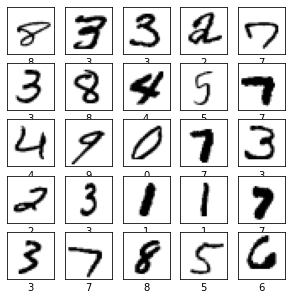

In [ ]:
# Choose random images to visualize
fig_size=5
train_size=60000

plt.figure(figsize=(fig_size, fig_size))
random_inds = np.random.choice(train_size, fig_size*fig_size)

for i in range(fig_size*fig_size):
    plt.subplot(fig_size, fig_size, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    # show images using a binary color map (black and white)
    plt.imshow(train_images[image_ind], cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [ ]:
# normalize data values from range 0-255 to 0-1
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

In [ ]:
# resize images size and one-hot encoding labels
train_labels = np_utils.to_categorical(train_labels, 10)
test_labels = np_utils.to_categorical(test_labels, 10)

# Implement Baseline Model

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation="softmax"))

In [ ]:
def top_5_categorical_accuracy(y_true, y_pred):
  return top_k_categorical_accuracy(y_true, y_pred, k=5)

learning_rate = 0.05
optimizer = SGD(learning_rate)
loss = MeanSquaredError()
metrics = ['accuracy', top_5_categorical_accuracy]

model.compile(optimizer, loss, metrics)

In [ ]:
# train model with history to track accuracy and loss
hist = model.fit(train_images, train_labels, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0637 - accuracy: 0.5758 - top_5_categorical_accuracy: 0.8614
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0354 - accuracy: 0.8132 - top_5_categorical_accuracy: 0.9722
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0273 - accuracy: 0.8533 - top_5_categorical_accuracy: 0.9796
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0239 - accuracy: 0.8667 - top_5_categorical_accuracy: 0.9820
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0219 - accuracy: 0.8745 - top_5_categorical_accuracy: 0.9839
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0206 - accuracy: 0.8796 - top_5_categorical_accuracy: 0.9848
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0197 - accuracy: 0.8841 - top_5_categorical_accuracy: 0.9855
Epoch 8/20
1875/1875 [=====

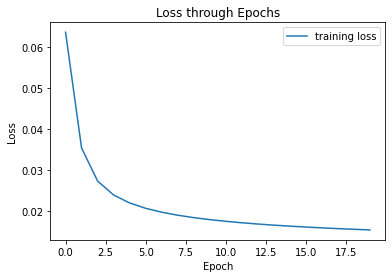

In [ ]:
epoch_num = 20

# plot loss of training set
fig = plt.figure()
plt.plot(np.arange(0, epoch_num), hist.history['loss'], label='training loss')
plt.title('Loss through Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
test_loss, test_acc, test_top_5 = model.evaluate(test_images, test_labels)

print(f"Test loss {test_loss}, test accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0145 - accuracy: 0.9118 - top_5_categorical_accuracy: 0.9898
Test loss 0.014469302259385586, test accuracy: 0.9118000268936157


# Visualization Result

In [ ]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

def de_onehot_label(labels):
  res_labels = []
  for label in labels:
    index = np.where(label == 1)
    res_labels.append(index[0][0])
  return res_labels

313/313 [==============================] - 0s 1ms/step


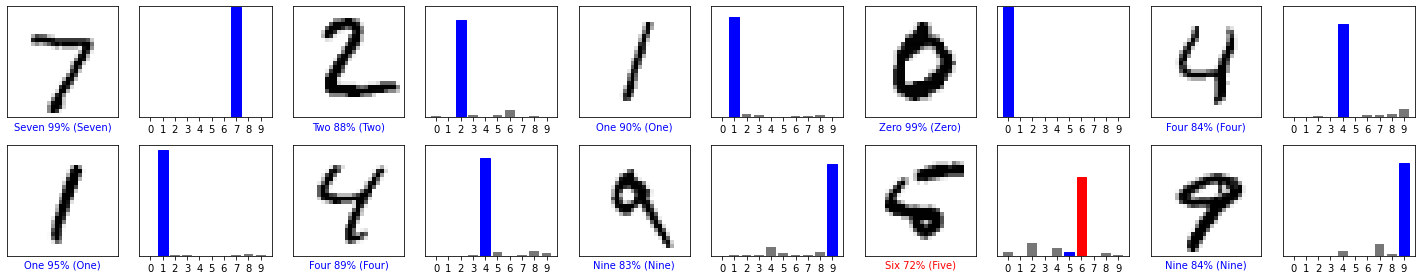

In [ ]:
predictions = model.predict(test_images)

num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(0, num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], de_onehot_label(test_labels), np.squeeze(test_images))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], de_onehot_label(test_labels))
plt.tight_layout()
plt.show()

# Convolutional Neural Networks Architecture

In [ ]:
cnn_model = Sequential()

# Feature Learning block
cnn_model.add(Conv2D(16, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Conv2D(24, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D((2,2)))

# Classification block:
cnn_model.add(Flatten())
cnn_model.add(Dense(10, activation='softmax'))

In [ ]:
# learning_rate=0.05
# optimizer = SGD(learning_rate)
# loss = MeanSquaredError()
# metrics = ['accuracy']

cnn_model.compile(optimizer, loss, metrics)

In [ ]:
hist = cnn_model.fit(train_images, train_labels, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 12s 3ms/step - loss: 0.0851 - accuracy: 0.3575 - top_5_categorical_accuracy: 0.6913
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0296 - accuracy: 0.8117 - top_5_categorical_accuracy: 0.9643
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0150 - accuracy: 0.9032 - top_5_categorical_accuracy: 0.9918
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0120 - accuracy: 0.9224 - top_5_categorical_accuracy: 0.9940
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0104 - accuracy: 0.9339 - top_5_categorical_accuracy: 0.9954
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0092 - accuracy: 0.9416 - top_5_categorical_accuracy: 0.9962
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0082 - accuracy: 0.9473 - top_5_categorical_accuracy: 0.9970
Epoch 8/20
1875/1875 [====

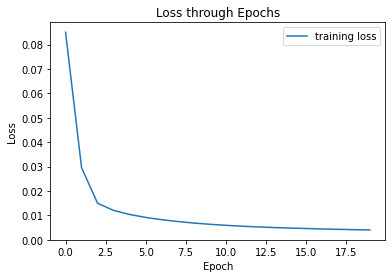

In [ ]:
fig = plt.figure()
plt.plot(np.arange(0, epoch_num), hist.history['loss'], label='training loss')
plt.title('Loss through Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
test_loss, test_acc, test_top_5 = cnn_model.evaluate(test_images, test_labels)

print(f"Test loss {test_loss}, test accuracy top 5: {test_top_5}")

In [ ]:
predictions = cnn_model.predict(test_images)

num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(0, num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], de_onehot_label(test_labels), np.squeeze(test_images))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], de_onehot_label(test_labels))
plt.tight_layout()
plt.show()

# Cross-Entropy loss function


In [ ]:
crossentropy_model = Sequential()

# Feature Learning block
crossentropy_model.add(Conv2D(16, (3,3), activation='relu'))
crossentropy_model.add(MaxPooling2D((2,2)))
crossentropy_model.add(Conv2D(24, (3,3), activation='relu'))
crossentropy_model.add(MaxPooling2D((2,2)))

# Classification block:
crossentropy_model.add(Flatten())
crossentropy_model.add(Dense(10, activation='softmax'))

In [ ]:
learning_rate = 0.05
optimizer = SGD(learning_rate)
loss = CategoricalCrossentropy()
metrics = ['accuracy']

crossentropy_model.compile(optimizer, loss, metrics)
hist = crossentropy_model.fit(train_images, train_labels, batch_size=32, epochs=20)

In [ ]:
fig = plt.figure()
plt.plot(np.arange(0, epoch_num), hist.history['loss'], label='training loss')
plt.title('Loss through Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
test_loss, test_acc = crossentropy_model.evaluate(test_images, test_labels)

print(f"Test loss {test_loss}, test accuracy: {test_acc}")

In [ ]:
predictions = crossentropy_model.predict(test_images)

num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(0, num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], de_onehot_label(test_labels), np.squeeze(test_images))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], de_onehot_label(test_labels))
plt.tight_layout()
plt.show()

# Stochastic Gradient Descent

In [ ]:
sgd_model = Sequential()

# Feature Learning block
sgd_model.add(Conv2D(16, (3,3), activation='relu'))
sgd_model.add(MaxPooling2D((2,2)))
sgd_model.add(Conv2D(24, (3,3), activation='relu'))
sgd_model.add(MaxPooling2D((2,2)))

# Classification block:
sgd_model.add(Flatten())
sgd_model.add(Dense(10, activation='softmax'))

In [ ]:
learning_rate = 0.01
optimizer = SGD(learning_rate)
loss = CategoricalCrossentropy()
metrics = ['accuracy']

sgd_model.compile(optimizer, loss, metrics)
hist = sgd_model.fit(train_images, train_labels, batch_size=1, steps_per_epoch=1875, epochs=20)

In [ ]:
fig = plt.figure()
plt.plot(np.arange(0, epoch_num), hist.history['loss'], label='training loss')
plt.title('Loss through Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
test_loss, test_acc = sgd_model.evaluate(test_images, test_labels)

print(f"Test loss {test_loss}, test accuracy: {test_acc}")

In [ ]:
predictions = sgd_model.predict(test_images)

num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(0, num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], de_onehot_label(test_labels), np.squeeze(test_images))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], de_onehot_label(test_labels))
plt.tight_layout()
plt.show()

# (Mini-)Batch Gradient Descent with batch_size = 128

In [ ]:
bgd_model = Sequential()

# Feature Learning block
bgd_model.add(Conv2D(16, (3,3), activation='relu'))
bgd_model.add(MaxPooling2D((2,2)))
bgd_model.add(Conv2D(24, (3,3), activation='relu'))
bgd_model.add(MaxPooling2D((2,2)))

# Classification block:
bgd_model.add(Flatten())
bgd_model.add(Dense(10, activation='softmax'))

In [ ]:
learning_rate = 0.05
optimizer = SGD(learning_rate)
loss = CategoricalCrossentropy()
metrics = ['accuracy']

bgd_model.compile(optimizer, loss, metrics)
hist = bgd_model.fit(train_images, train_labels, batch_size=128, epochs=20)

In [ ]:
epoch_num = 20

fig = plt.figure()
plt.plot(np.arange(0, epoch_num), hist.history['loss'], label='training loss')
plt.title('Loss through Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
test_loss, test_acc = bgd_model.evaluate(test_images, test_labels)

print(f"Test loss {test_loss}, test accuracy: {test_acc}")

In [ ]:
predictions = bgd_model.predict(test_images)

num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(0, num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], de_onehot_label(test_labels), np.squeeze(test_images))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], de_onehot_label(test_labels))
plt.tight_layout()
plt.show()